In [1]:
import pandas as pd
df = pd.read_csv("HopaneDataFrame.csv")
df.set_index("Unnamed: 0", inplace=True)
print(df.loc[df["Compounds"].str.contains("1_1-M-Adam")]) #get the compound and its values (test)
print(df)

            RetentionTime Sample 1   Compounds       A        B  \
Unnamed: 0                                                        
0                            12.22  1_1-M-Adam  3004.0  23763.0   

            NormalisedToHopane  % 2/3 After Normalisation  
Unnamed: 0                                                 
0                  8237.560038                  34.665489  
            RetentionTime Sample 1          Compounds        A        B  \
Unnamed: 0                                                                
0                            12.22         1_1-M-Adam   3004.0  23763.0   
1                            15.18      2_1,2-DM-Adam   2723.0  12903.0   
2                            15.55            3_i-C13   2108.0  14144.0   
3                            15.46     4_2-M-Tetralin   8771.0  41435.0   
4                            15.37  5_c-1,3,4-TM-Adam   1912.0   8799.0   
...                            ...                ...      ...      ...   
140               

In [2]:
import difflib
#testing only
def find_value(name: str):
    return [df.loc[df["Compounds"].str.contains(difflib.get_close_matches(name, df["Compounds"])[0])].loc[:,"RetentionTime Sample 1"], df.loc[df["Compounds"].str.contains(difflib.get_close_matches(name, df["Compounds"])[0])].loc[:,"% 2/3 After Normalisation"]]

In [3]:
def find_value(name: str):
    return [df.loc[df["Compounds"].str.contains(name,regex=False)].loc[:,"RetentionTime Sample 1"], df.loc[df["Compounds"].str.contains(name,regex=False)].loc[:,"% 2/3 After Normalisation"]]
find_value("59_29bbR+S") #why does 135_C28 (22S) work without a comma??? WTF pls help (solved, SOLUTION= regex=False, does not allow str.contains to return series)

[Unnamed: 0
 58    46.25
 Name: RetentionTime Sample 1, dtype: float64,
 Unnamed: 0
 58    92.363215
 Name: % 2/3 After Normalisation, dtype: float64]

            RetentionTime Sample 1   Compounds       A        B  \
Unnamed: 0                                                        
0                            12.22  1_1-M-Adam  3004.0  14631.0   

            NormalisedToBS10  % 2/3 After Normalisation  
Unnamed: 0                                               
0                 8095.67396                  55.332335  
            RetentionTime Sample 1          Compounds        A        B  \
Unnamed: 0                                                                
0                            12.22         1_1-M-Adam   3004.0  14631.0   
1                            15.18      2_1,2-DM-Adam   2723.0   9497.0   
2                            15.55            3_i-C13   2108.0  10892.0   
3                            15.46     4_2-M-Tetralin   8771.0  33691.0   
4                            15.37  5_c-1,3,4-TM-Adam   1912.0   6980.0   
...                            ...                ...      ...      ...   
140                     

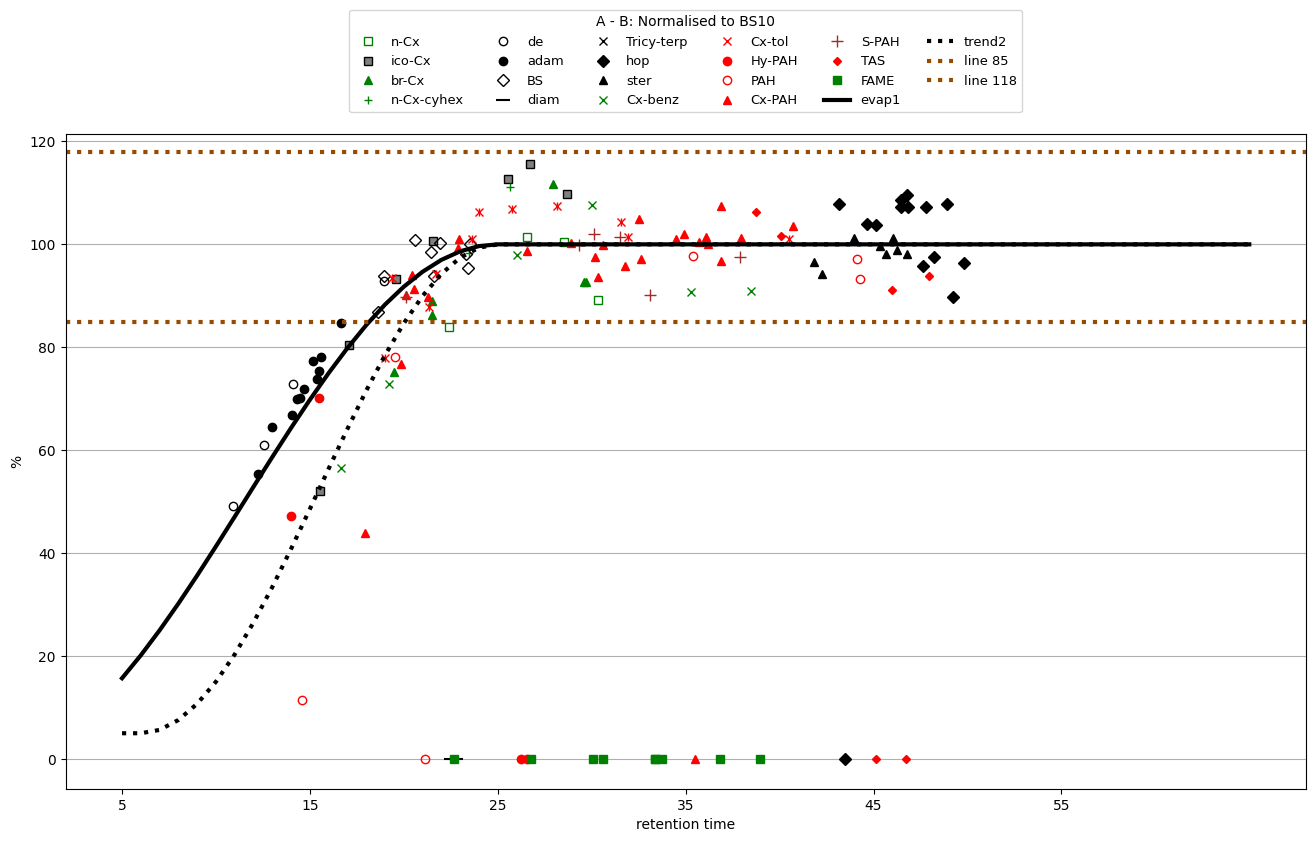

In [6]:
import matplotlib.pyplot as plt
import ValueStorage
import numpy as np
import pandas as pd
import math

#load dataframe
df = pd.read_csv("BS10DataFrame.csv")
df.set_index("Unnamed: 0", inplace=True)
print(df.loc[df["Compounds"].str.contains("1_1-M-Adam")]) #get the compound and its values (test)
print(df)

#define function to find compound information based on compound name
def find_value(name: str):
    return [df.loc[df["Compounds"].str.contains(name,regex=False)].loc[:,"RetentionTime Sample 1"], df.loc[df["Compounds"].str.contains(name,regex=False)].loc[:,"% 2/3 After Normalisation"]]
find_value("59_29bbR+S") #why does 135_C28 (22S) work without a comma??? WTF pls help (solved, SOLUTION= regex=False, does not allow str.contains to return series)

#stable line values
lineLowRet = -2
lineHighRet=25
lineMinValue=0
lineMaxValue=100
dottedLowRet=6
dottedHighRet=25
dottedMinValue=5
dottedMaxValue=100
MaxTrendline=60

#setting up the graph
countPerElement = [1,4,11,17,19,23,34,43,45,49,63,71,77,88,92,98,124,130,136,145]
fig, ax = plt.subplots(figsize=(16,10))                                                                                  
count = 1
indexCount = 1

#declaring compound groups to plot
rt_nCx=[]
v_nCX=[]
rt_isoCx=[]
v_isoCx=[]
rt_brCx=[]
v_brCx=[]
rt_nCxCyhex=[]
v_nCxCyhex=[]
rt_de=[]
v_de=[]
rt_adam=[]
v_adam=[]
rt_BS=[]
v_BS=[]
rt_diam=[]
v_diam=[]
rt_tricyTerp=[]
v_tricyTerp=[]
rt_hopa=[]
v_hopa=[]
rt_ster=[]
v_ster=[]
rt_CxBenz=[]
v_CxBenz=[]
rt_cxTol=[]
v_cxTol=[]
rt_HyPAH=[]
v_HyPAH=[]
rt_PAH=[]
v_PAH=[]
rt_CxPAH=[]
v_CxPAH=[]
rt_SPAH=[]
v_SPAH=[]
rt_TAS=[]
v_TAS=[]
rt_FAME=[]
v_FAME=[]

#assigning values to compounds
for i in ValueStorage.PW_PlotValues:
    datax, datay = find_value(i)
    if indexCount>= 1 and indexCount <= 4: #0
        rt_nCx.append(datax)
        v_nCX.append(datay)
    if indexCount>4 and indexCount<=11: #1
        rt_isoCx.append(datax)
        v_isoCx.append(datay)
    if indexCount>11 and indexCount<=17: #2
        rt_brCx.append(datax)
        v_brCx.append(datay)
    if indexCount>17 and indexCount<=19:#3
        rt_nCxCyhex.append(datax)
        v_nCxCyhex.append(datay)
    if indexCount>19 and indexCount<=23: #4
        rt_de.append(datax)
        v_de.append(datay)
    if indexCount>23 and indexCount<=34: #5
        rt_adam.append(datax)
        v_adam.append(datay)
    if indexCount>34 and indexCount<=43: #6
        rt_BS.append(datax)
        v_BS.append(datay)
    if indexCount>43 and indexCount<=45: #7
        rt_diam.append(datax)
        v_diam.append(datay)
    if indexCount>45 and indexCount<=49: #8
        rt_tricyTerp=[]
        v_tricyTerp=[]
    if indexCount>49 and indexCount<=63: #9
        rt_hopa.append(datax)
        v_hopa.append(datay)
    if indexCount>63 and indexCount<=71: #10
        rt_ster.append(datax)
        v_ster.append(datay)
    if indexCount>71 and indexCount<=77: #11
        rt_CxBenz.append(datax)
        v_CxBenz.append(datay)
    if indexCount>77 and indexCount<=88: #12
        rt_cxTol.append(datax)
        v_cxTol.append(datay)
    if indexCount>88 and indexCount<=92: #13
        rt_HyPAH.append(datax)
        v_HyPAH.append(datay)
    if indexCount>92 and indexCount<=98: #14
        rt_PAH.append(datax)
        v_PAH.append(datay)
    if indexCount>98 and indexCount<=124: #15
        rt_CxPAH.append(datax)
        v_CxPAH.append(datay)
    if indexCount>124 and indexCount<=130: #16
        rt_SPAH.append(datax)
        v_SPAH.append(datay)
    if indexCount>130 and indexCount<=136: #17
        rt_TAS.append(datax)
        v_TAS.append(datay)
    if indexCount>136 and indexCount<=146: #18
        rt_FAME.append(datax)
        v_FAME.append(datay)
        #print(i) #show compounds
    indexCount += 1

#plotting compounds, rearrange the lines as you see fit to alter the order of the compounds on the legend
ax.plot(rt_nCx, v_nCX , marker='s',markerfacecolor='none', ls='none',color = "green",label = "n-Cx") #n-Cx
ax.plot(rt_isoCx, v_isoCx, marker='s', ls='none',color = "Grey",label = "ico-Cx",markeredgewidth=1, markeredgecolor="black") #iso-Cx
ax.plot(rt_brCx, v_brCx , marker='^', ls='none',color = "Green",label = "br-Cx") #br-Cx
ax.plot(rt_nCxCyhex, v_nCxCyhex, marker='+', ls='none',color = "green",label = "n-Cx-cyhex",ms=6) #nCxCyhex
ax.plot(rt_de, v_de, marker='.',markerfacecolor='none', ls='none',color = "Black",label = "de",ms=12) #de
ax.plot(rt_adam, v_adam, marker='.', ls='none',color = "black",label = "adam",ms=12) #adam
ax.plot(rt_BS, v_BS, marker='D',markerfacecolor='none', ls='none',color = "black",label = "BS") #BS
ax.plot(rt_diam, v_diam, marker='_', ls='none',color = "Black",label = "diam",markeredgewidth=1.5, markeredgecolor="black",ms=10) #diam
ax.plot(rt_tricyTerp, v_tricyTerp, marker='x', ls='none',color = "black",label = "Tricy-terp") #tricyTerp
ax.plot(rt_tricyTerp, v_tricyTerp, marker='|', ls='none',color = "black") #tricyTerp
ax.plot(rt_hopa, v_hopa, marker='D', ls='none',color = "Black",label = "hop") #hop
ax.plot(rt_ster, v_ster, marker='^', ls='none',color = "Black",label = "ster") #ster
ax.plot(rt_CxBenz, v_CxBenz, marker='x', ls='none',color = "green",label = "Cx-benz") #Cx-Benz
ax.plot(rt_cxTol, v_cxTol, marker='x', ls='none',color = "red",label = "Cx-tol") #Cx-tol
ax.plot(rt_cxTol, v_cxTol, marker='|', ls='none',color = "red") #Cx-tol
ax.plot(rt_HyPAH, v_HyPAH, marker='.', ls='none',color = "Red",label = "Hy-PAH",ms=12) #Hy-PAH
ax.plot(rt_PAH, v_PAH, marker='.',markerfacecolor='none', ls='none',color = "Red",label = "PAH",ms=12) #PAH
ax.plot(rt_CxPAH, v_CxPAH, marker='^', ls='none',color = "Red",label = "Cx-PAH") #Cx-PAH
ax.plot(rt_SPAH, v_SPAH, marker='+', ls='none',color = "Brown",label = "S-PAH", ms=8) #S-PAH
ax.plot(rt_TAS, v_TAS, marker='D', ls='none',color = "Red",label = "TAS", ms=4) #TAS
ax.plot(rt_FAME, v_FAME, marker='s', ls='none',color = "green",label = "FAME",ms=6) #FAME

#set up constant line values
controlRT=[]
lineFactor=[]
lineYvalue=[]
dottedFactor=[]
dottedYvalue=[]
for i in range(5,MaxTrendline+6):
    controlRT.append(i)
    #line
    lineFactor.append(180*((i-lineLowRet)/(lineHighRet-lineLowRet)))
    if lineLowRet>i:
        lineYvalue.append(lineMinValue)
    else:
        if i>lineHighRet:
            lineYvalue.append(lineMaxValue)
        else:
            lineYvalue.append(lineMinValue+((lineMaxValue-lineMinValue)/2)+(math.sin(math.radians(180*((i-lineLowRet)/(lineHighRet-lineLowRet))-90))*((lineMaxValue-lineMinValue)/2)))
    #dotted line
    dottedFactor.append(180*((i-dottedLowRet)/(dottedHighRet-dottedLowRet)))
    if dottedLowRet>i:
        dottedYvalue.append(dottedMinValue)
    else:
        if i>dottedHighRet:
            dottedYvalue.append(dottedMaxValue)
        else:
            dottedYvalue.append(dottedMinValue+((dottedMaxValue-dottedMinValue)/2)+(math.sin(math.radians(180*((i-dottedLowRet)/(dottedHighRet-dottedLowRet))-90))*((dottedMaxValue-dottedMinValue)/2)))
print(lineYvalue)

#create dataframe for future use
TrendLineStableCompounds = pd.DataFrame()
TrendLineStableCompounds["ret time"]=controlRT
TrendLineStableCompounds["line factor"]=lineFactor
TrendLineStableCompounds["line y value"]=lineYvalue
TrendLineStableCompounds["dotted line factor"]=dottedFactor
TrendLineStableCompounds["dotted y value"]=dottedYvalue

#show dataframe
print(TrendLineStableCompounds)

#assign variables to values on dataframe to plot
x = TrendLineStableCompounds["ret time"]
y = TrendLineStableCompounds["line y value"]
y2 = TrendLineStableCompounds["dotted y value"]
#plot line
ax.plot(x,y,color = "black",linestyle = "-",label = "evap1",linewidth = 3)
ax.plot(x,y2,color = "black",linestyle = ":",label = "trend2",linewidth = 3)
ax.axhline(y = 85, color = '#964B00', linestyle = ':',label = "line 85", linewidth = 3) 
ax.axhline(y = 118, color = '#964B00', linestyle = ':', label = "line 118",linewidth = 3) 

#continue on setting up graph
plt.xticks(np.arange(5,65, step=10)) 
plt.yticks(np.arange(0,140,step=20))
ax.set_xlabel("retention time", loc='center')
ax.set_ylabel('%')
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])

#set legend
ax.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5,1.2),
    ncol = 6,
    title = "A - B: Normalised to BS10",
    fontsize = 9.4,
    )
plt.grid(axis = "y")

plt.savefig("finalBS10.png")

In [268]:
#drawing constant lines
ax.axhline(y = 85, color = '#964B00', linestyle = ':',label = "line 85", linewidth = 3) 
ax.axhline(y = 118, color = '#964B00', linestyle = ':', label = "line 118",linewidth = 3) 

ax.plot(x,y,color = "black",linestyle = "-",label = "evap1",linewidth = 3)
ax.plot(x,y2,color = "black",linestyle = ":",label = "trend2",linewidth = 3)

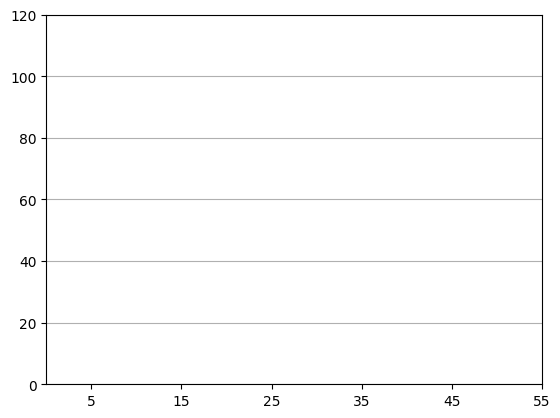